# Chapter py_08 
 Statistics for Data Science and Analytics<br>
by Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

Publisher: Wiley; 1st edition (2024) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2024 Peter C. Bruce, Peter Gedeck, Janet F. Dobbins

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. 
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/sdsa-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/sdsa-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

# Contingency tables and chi-square tests

In [2]:
import pandas as pd
marriage_therapy = pd.read_csv("marriage-therapy.csv")
contingency_table = pd.crosstab(marriage_therapy["Therapy"], marriage_therapy["Outcome"])
contingency_table

Outcome,Distress Married,Divorced,Happily Married
Therapy,,,
Behavioral,3,11,15
Insight,5,1,24


In [3]:
def expected_table(observed_table):
    total = observed_table.sum().sum()
    row_prob = observed_table.sum(axis=1) / total
    col_prob = observed_table.sum(axis=0) / total
    expected = pd.DataFrame(index=observed_table.index,
                            columns=observed_table.columns)
    for row in observed_table.index:
        for col in observed_table.columns:
            expected.loc[row, col] = row_prob[row] * col_prob[col] * total
    return expected

In [4]:
print(expected_table(contingency_table))

Outcome    Distress Married  Divorced Happily Married
Therapy                                              
Behavioral         3.932203  5.898305       19.169492
Insight            4.067797  6.101695       19.830508


In [5]:
import numpy as np
def expected_table(observed_table):
    total = observed_table.sum().sum()
    row_sums = observed_table.sum(axis=1)
    col_sums = observed_table.sum(axis=0)
    expected = np.outer(row_sums, col_sums) / total
    return pd.DataFrame(expected,
             index=observed_table.index, columns=observed_table.columns)

expected_table(contingency_table).round(2)

Outcome,Distress Married,Divorced,Happily Married
Therapy,,,
Behavioral,3.93,5.9,19.17
Insight,4.07,6.1,19.83


In [6]:
import random
random.seed(123)

def calculate_difference(contingency_table):
    expected = expected_table(contingency_table)
    difference = contingency_table - expected
    return difference.abs().sum().sum()

def resample(therapy_box, outcome_box):
    random.shuffle(outcome_box)
    contingency_table = pd.crosstab(therapy_box, outcome_box)
    return calculate_difference(contingency_table)

outcome_box = ["Happily Married"]*39 + ["Distress Married"]*8 + ["Divorced"]*12
therapy_box = ["Behavioral"]*29 + ["Insight"]*30

resamples = np.array([resample(therapy_box, outcome_box)
             for _ in range(10000)])

observed = calculate_difference(contingency_table)

print(f"Observed difference: {observed:.2f}")
print(f"Resamples above observed difference: {np.sum(resamples >= observed)}")
print("p-value:", np.mean(np.array(resamples) >= observed))

Observed difference: 20.41
Resamples above observed difference: 68
p-value: 0.0068


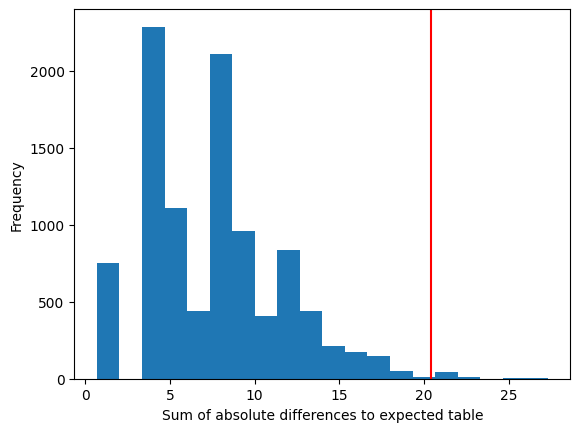

In [7]:
ax = pd.Series(resamples).plot.hist(bins=20)
ax.axvline(observed, color="red")
ax.set_xlabel("Sum of absolute differences to expected table")
ax.set_ylabel("Frequency")
plt.show()

In [8]:
from collections import Counter
random.seed(123)

box = list(range(10))

differences = []
for _ in range(10_000):
    random.shuffle(box)
    resample = random.choices(box, k=315)
    counts = Counter(resample)
    difference = sum(abs(counts[i] - 31.5) for i in range(10))
    differences.append(difference)
differences = np.array(differences)
above_216 = sum(differences >= 216)
p_value = above_216 / len(differences)

print(f"Number of resamples with sum of absolute deviations >= 216:{above_216}")
print(f"p-value = {p_value:.4f}")

Number of resamples with sum of absolute deviations >= 216:0
p-value = 0.0000


In [9]:
fat_absorption = pd.DataFrame([
    [1, 164, 178, 175, 155],
    [2, 172, 191, 193, 166],
    [3, 168, 197, 178, 149],
    [4, 177, 182, 171, 164],
    [5, 156, 185, 163, 170],
    [6, 195, 177, 176, 168],
], columns=["Replication", "Fat 1", "Fat 2", "Fat 3", "Fat 4"])

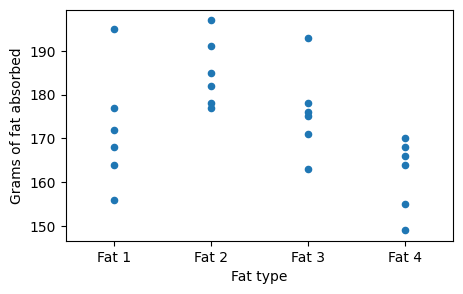

In [10]:
fats = ["Fat 1", "Fat 2", "Fat 3", "Fat 4"]

# convert from wide to long format for plotting
fat_long = fat_absorption.melt(value_vars=fats, var_name="group")

fig, ax = plt.subplots(figsize=(5, 3))
fat_long.plot.scatter(x="group", y="value", ax=ax)
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(-0.5, 3.5)
plt.show()

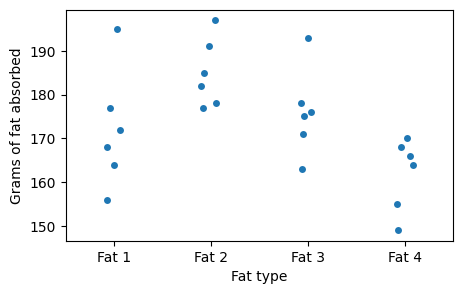

In [11]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 3))
sns.stripplot(data=fat_long, x="group", y="value", color='C0', jitter=True, ax=ax)
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(-0.5, 3.5)
plt.show()

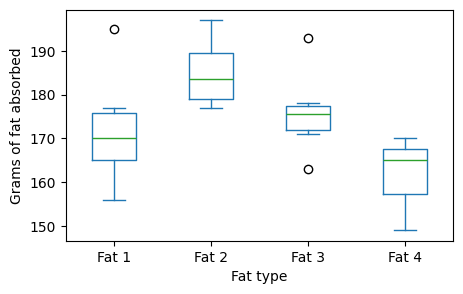

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))
fat_absorption[fats].plot.box(ax=ax)
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
plt.show()

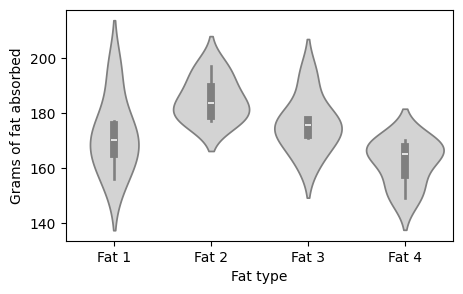

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 3))
sns.violinplot(data=fat_long, x="group", y="value", color="lightgrey", ax=ax)
ax.set_xlabel("Fat type")
ax.set_ylabel("Grams of fat absorbed")
ax.set_xlim(-0.5, 3.5)
plt.show()

In [14]:
def calculate_deviation(data, group, values):
    total_mean = data[values].mean()
    group_means = data.groupby(group)[values].mean()
    k = len(group_means)
    return sum((group_means - total_mean)**2) / (k - 1)

deviation = calculate_deviation(fat_long, "group", "value")
print(f"Deviation: {deviation:.2f}")

Deviation: 90.92


In [15]:
rng = np.random.default_rng(seed=4321)
observed = calculate_deviation(fat_long, "group", "value")
resamples = []
box = fat_long.copy()
for _ in range(10_000):
    shuffled = box["group"].sample(frac=1, random_state=rng)
    box["group"] = shuffled.to_numpy()
    resamples.append(calculate_deviation(box, "group", "value"))
resamples = np.array(resamples)
p_value = np.mean(resamples >= observed)

print(f"Observed deviation:{observed:.2f}")
print(f"Resamples above observed deviation: {np.sum(resamples >= observed)}")
print(f"p-value: {p_value:.4f}")

Observed deviation:90.92
Resamples above observed deviation: 84
p-value: 0.0084


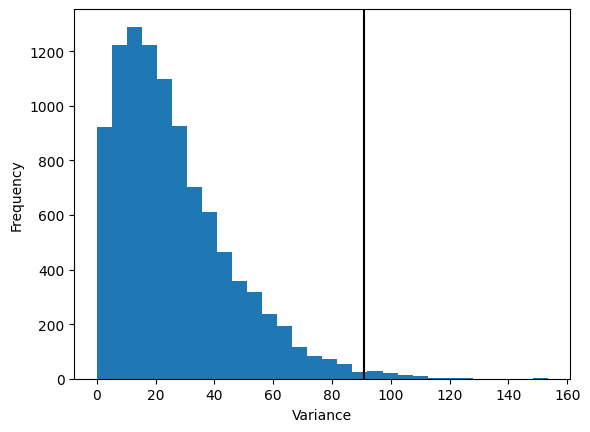

In [16]:
ax = pd.Series(resamples).plot.hist(bins=30)
ax.set_xlabel("Variance")
ax.axvline(observed, color="black")
plt.show()

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("value ~ C(group)", data=fat_long).fit()
table = sm.stats.anova_lm(model)
print(table)

            df  sum_sq  mean_sq         F    PR(>F)
C(group)   3.0  1636.5    545.5  5.406343  0.006876
Residual  20.0  2018.0    100.9       NaN       NaN
